

## Naive Bayes Classifier
 Imagine you’re teaching a computer to make decisions, like figuring out if an email is spam or not. The Naive Bayes classifier is a straightforward and popular method for this.

### What Is a Classifier?

A **classifier** is a tool that looks at some information (called **features**) and decides what category (or **class**) it belongs to. For example:
- **Features**: Words in an email, like "free," "money," or "win."
- **Classes**: "Spam" or "Not Spam."

The classifier’s job is to take those features and pick the right class. Naive Bayes does this using **probability**.

---

### How Does It Work? The Big Idea

Naive Bayes is based on **Bayes’ Theorem**, a math rule that helps us figure out the chance of something based on what we already know. Here’s the basic idea:
- You want to know: "Given these features, how likely is this class?"
- Bayes’ Theorem uses probabilities from past data to answer this.

In math terms, Bayes’ Theorem is:

$ P(\text{class}|\text{features}) = \frac{P(\text{features}|\text{class}) \cdot P(\text{class})}{P(\text{features})} $

Let’s break it down:
- $ P(\text{class}|\text{features}) $: Probability of the class (e.g., Spam) given the features (e.g., email words). This is what we want!
- $ P(\text{features}|\text{class}) $: Probability of seeing these features if we know the class (e.g., how likely are these words if it’s Spam?).
- $ P(\text{class}) $: Probability of the class by itself (e.g., how common is Spam?).
- $ P(\text{features}) $: Probability of the features overall (e.g., how common are these words?).

---

### The "Naive" Part

The "naive" part assumes that all features are **independent** once we know the class. For example, it assumes the word "free" doesn’t affect whether "money" appears, given the email is Spam. This isn’t always true in real life, but it simplifies the math.

Because of this, we can multiply the probabilities of each feature:

$ P(\text{features}|\text{class}) = P(\text{feature}_1|\text{class}) \times P(\text{feature}_2|\text{class}) \times \cdots \times P(\text{feature}_n|\text{class}) $

So the full formula becomes:

$ P(\text{class}|\text{features}) = \frac{P(\text{class}) \times P(\text{feature}_1|\text{class}) \times P(\text{feature}_2|\text{class}) \times \cdots \times P(\text{feature}_n|\text{class})}{P(\text{features})} $

---

### Making a Prediction

To classify, we just need the most likely class. Since $ P(\text{features}) $ is the same for all classes, we can skip it and compare:

$ P(\text{class}) \times P(\text{feature}_1|\text{class}) \times P(\text{feature}_2|\text{class}) \times \cdots \times P(\text{feature}_n|\text{class}) $

We calculate this for each class and pick the biggest one!

---

### A Simple Example: Will We Play Tennis?

Let’s predict if someone will play tennis based on weather:
- **Features**: Outlook (Sunny, Overcast, Rainy), Temperature (Hot, Mild, Cool), Humidity (High, Normal), Wind (Weak, Strong).
- **Classes**: Yes (play), No (don’t play).

#### Step 1: Learn from Data
Here’s a tiny dataset:

| Day | Outlook  | Temperature | Humidity | Wind  | Play |
|-----|----------|-------------|----------|-------|------|
| 1   | Sunny    | Hot         | High     | Weak  | Yes  |
| 2   | Overcast | Hot         | High     | Weak  | Yes  |
| 3   | Rainy    | Mild        | High     | Weak  | No   |
| 4   | Sunny    | Cool        | Normal   | Strong| No   |

- **Class Probabilities**:
  - $ P(\text{Yes}) = \frac{2}{4} = 0.5 $
  - $ P(\text{No}) = \frac{2}{4} = 0.5 $

- **Feature Probabilities** (with Laplace smoothing, adding 1 to avoid zeros):
  - $ P(\text{Sunny}|\text{Yes}) = \frac{1 + 1}{2 + 3} = \frac{2}{5} $
  - $ P(\text{Overcast}|\text{Yes}) = \frac{1 + 1}{2 + 3} = \frac{2}{5} $
  - $ P(\text{Rainy}|\text{Yes}) = \frac{0 + 1}{2 + 3} = \frac{1}{5} $
  - $ P(\text{Sunny}|\text{No}) = \frac{1 + 1}{2 + 3} = \frac{2}{5} $
  - (Calculate others similarly—skipped for brevity!)

#### Step 2: Predict a New Day
New weather: **Sunny, Hot, High Humidity, Weak Wind**.

- For **Yes**:
  $ 0.5 \times \frac{2}{5} \times \frac{3}{5} \times \frac{3}{4} \times \frac{3}{4} = 0.0675 $

- For **No**:
  $ 0.5 \times \frac{2}{5} \times \frac{1}{5} \times \frac{1}{2} \times \frac{1}{2} = 0.01 $

Since 0.0675 > 0.01, we predict **Yes**!

---

### Handling Small Numbers

Multiplying tiny probabilities can cause issues. We can use logarithms to turn it into addition:

$ \log P(\text{class}|\text{features}) = \log P(\text{class}) + \log P(\text{feature}_1|\text{class}) + \cdots + \log P(\text{feature}_n|\text{class}) $

This avoids problems and picks the same winner.

---

### What If Features Are Numbers?

For numeric features (e.g., Temperature = 75°F), Naive Bayes uses a Gaussian formula:

$ P(\text{feature}|\text{class}) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(\text{feature} - \mu)^2}{2\sigma^2}\right) $

Here, `$ \mu $` is the mean and `$ \sigma $` is the standard deviation from the data.

---

### Why Use It?

- **Pros**: Simple, fast, works with little data, great for text tasks.
- **Cons**: Assumes independence (not always true), might miss complex patterns.

Still, it’s a solid starting point!

---

Copy this into Colab, and the formulas will display beautifully! Let me know if you need more help.

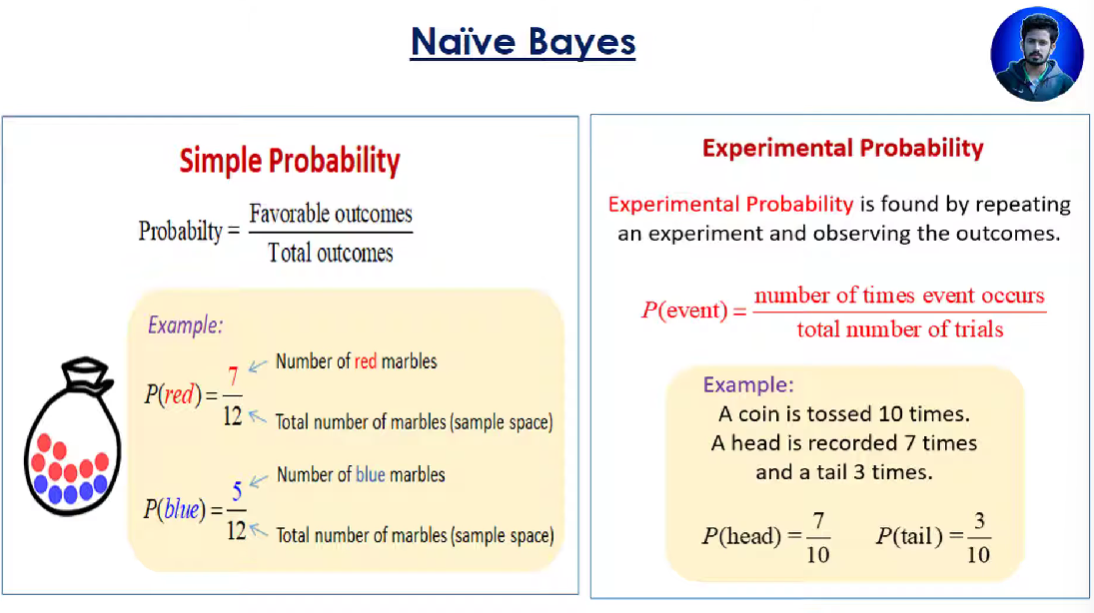

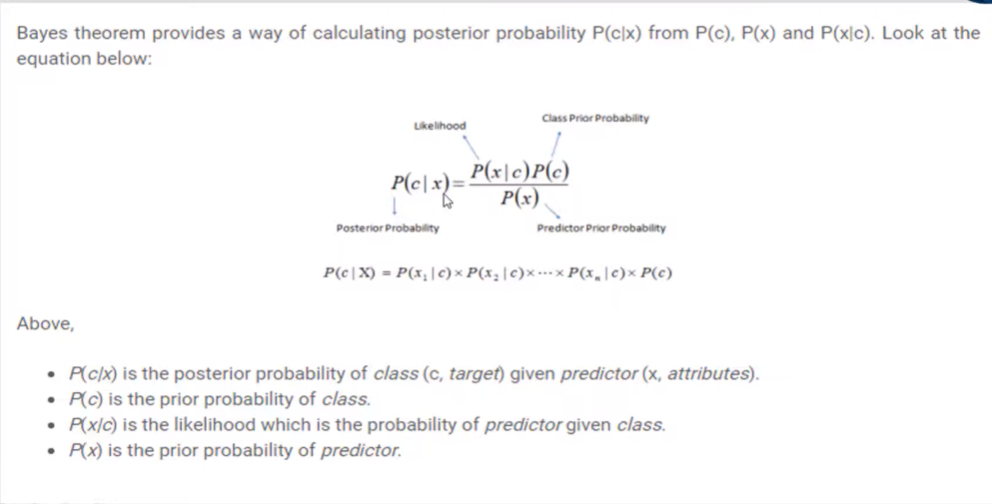

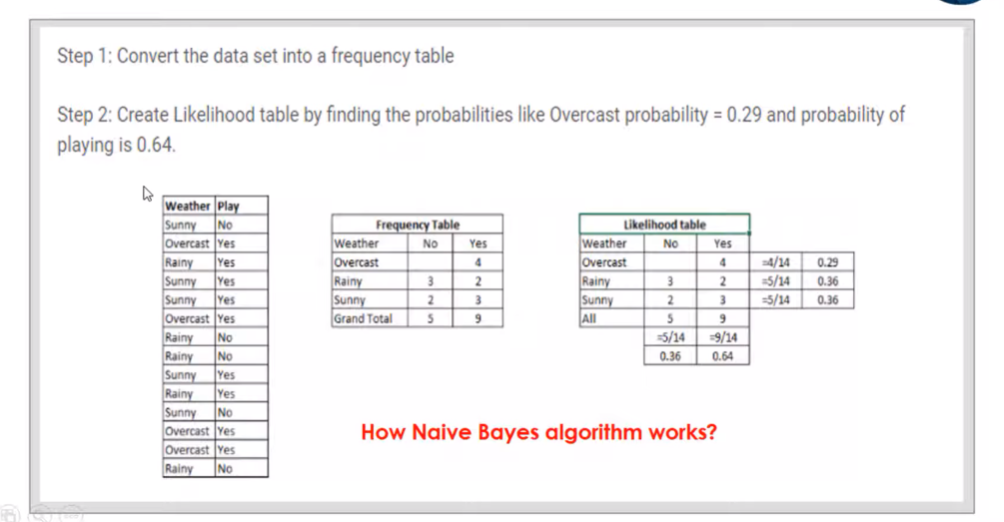

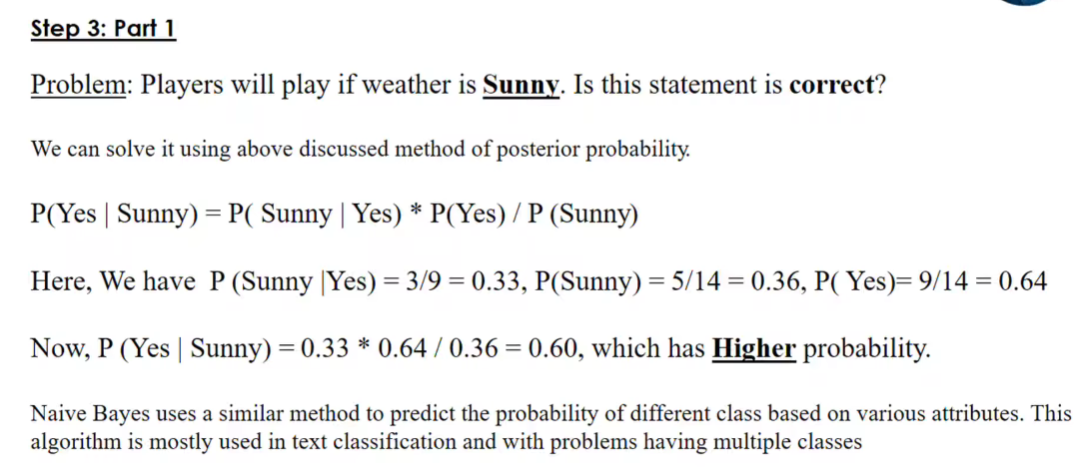

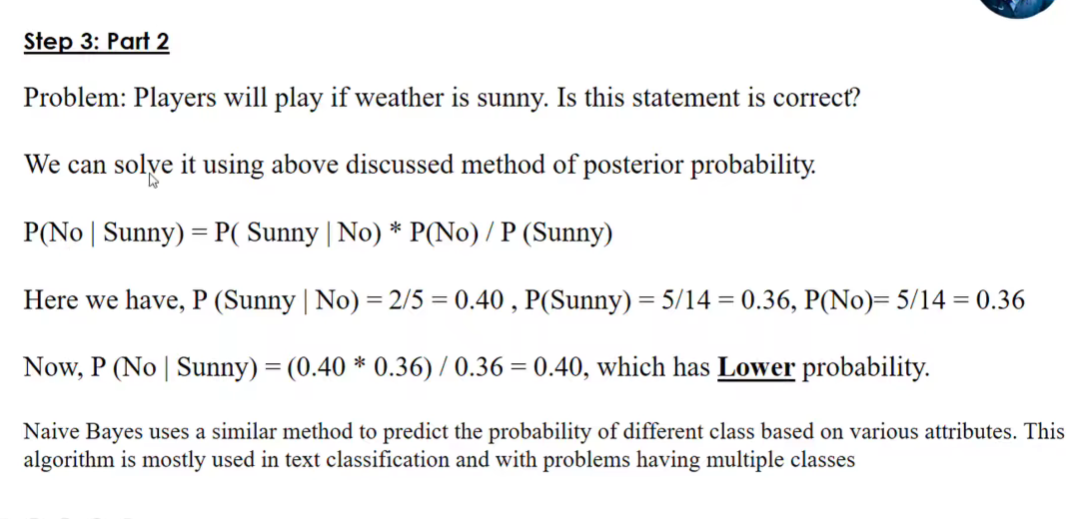

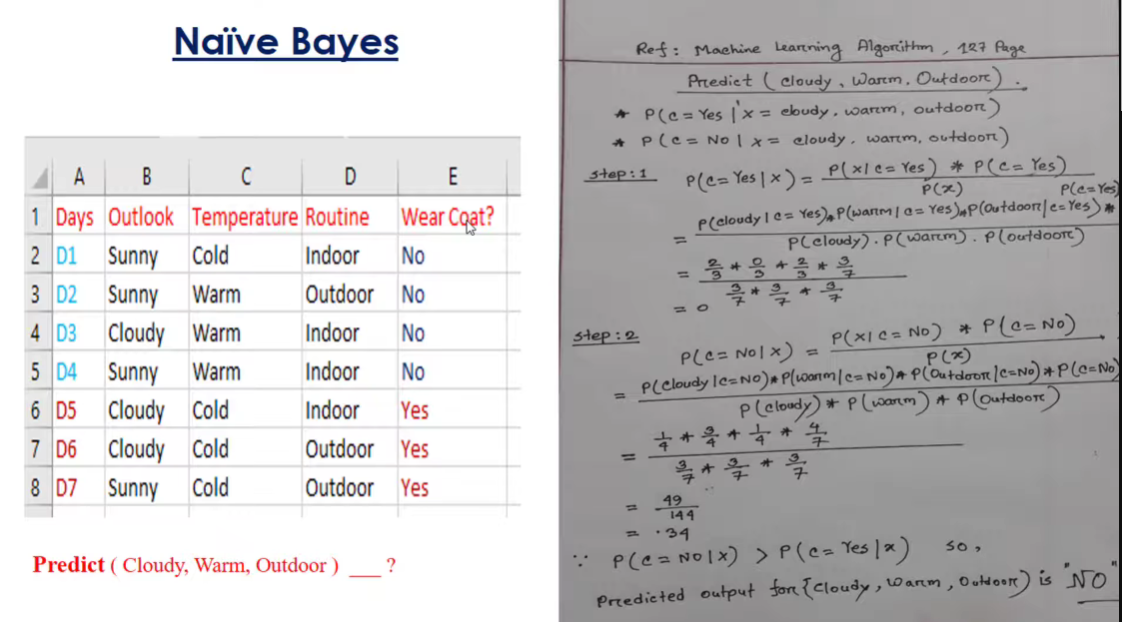

In [ ]:
from IPython.display import Image, display


image_files = [
   '/content/Screenshot_20250311_015950.png',
   '/content/Screenshot_20250311_020530.png',
   '/content/Screenshot_20250311_020856.png',
   '/content/Screenshot_20250311_022042.png',
   '/content/Screenshot_20250311_022333.png',
   '/content/Screenshot_20250311_022625.png'
]


for image_file in image_files:
    display(Image(filename=image_file))

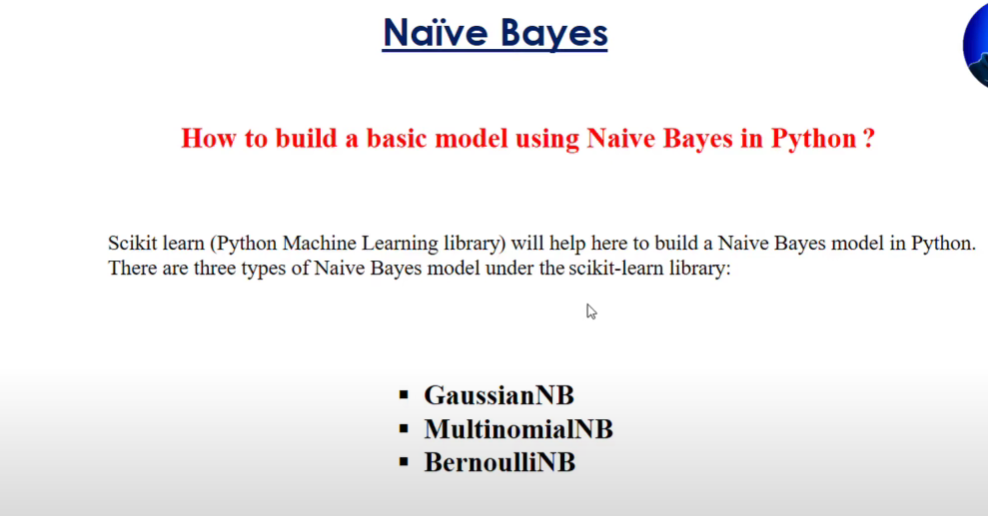

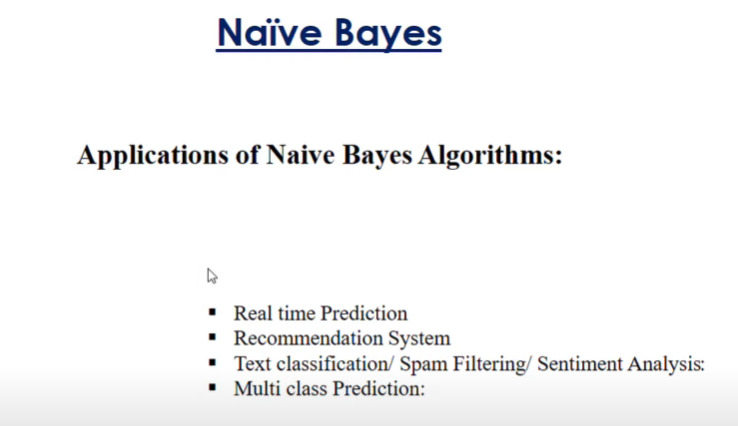

In [ ]:
from IPython.display import Image, display


image_files = [
   '/content/Screenshot_20250311_081234.png',
   '/content/Screenshot_20250311_081251.png'
]


for image_file in image_files:
    display(Image(filename=image_file))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
x = df.drop(['default.payment.next.month'], axis=1)
y = df['default.payment.next.month']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
model = SVC()
model.fit(x_train, y_train)
model.score(x_test,y_test)



0.7776

In [9]:
# Naive Bayes Theorem

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
GNB.score(x_test, y_test)



0.3848

In [10]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(x_train, y_train)
BNB.score(x_test, y_test)

0.7713333333333333

In [11]:
# multinomial (will not work)
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
MNB.score(x_test, y_test)

ValueError: Negative values in data passed to MultinomialNB (input X).